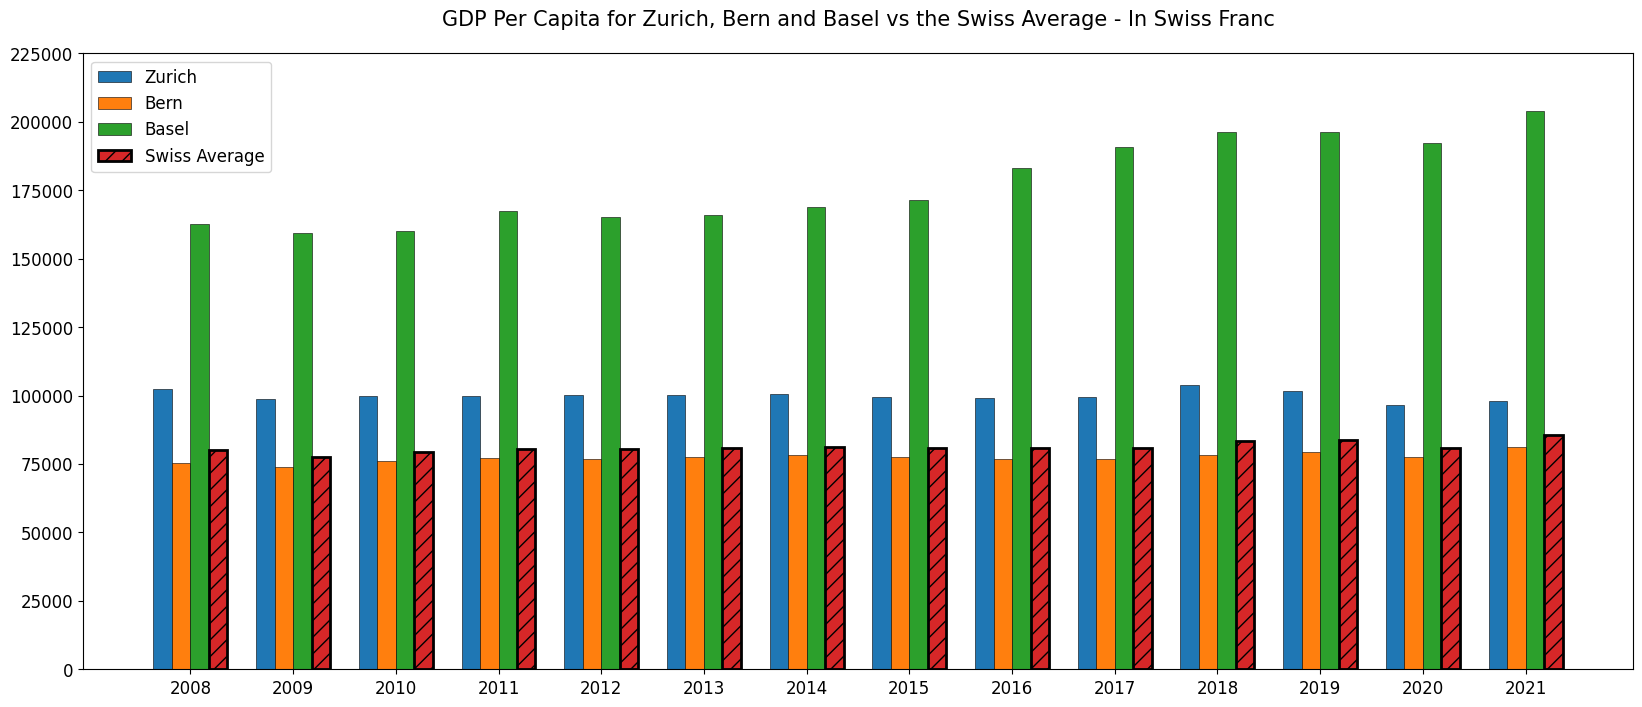

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os

# Set the font
font = 'sans-serif'  
rcParams['font.family'] = font
rcParams['font.size'] = 12

# Load the data
df = pd.read_csv(f"{os.getcwd()}/Datasets/GDPSwiss.csv")


# Filter for the desired cantons
subset = ["Zurigo", "Berna", "Svizzera", "Basilea Città"]

df = df[df["Cantone"].isin(subset)]

# Translate the canton names to English
translations = {
    "Zurigo": "Zurich",
    "Berna": "Bern",
    "Basilea Città": "Basel",
    "Svizzera": "Swiss Average"
}

# Translate the 'Cantone' column to English and replace 'Svizzera' with 'Swiss Average'
df['Cantone'] = df['Cantone'].map(translations)

# Set the index to the Cantone for easier plotting
df.set_index("Cantone", inplace=True)

# Replace the apostrophes and convert the strings to integers
df = df.replace("'", '', regex=True).astype(int)

# Transpose the DataFrame to have years as rows
df = df.T

# We need to set the positions for each group on the x-axis
positions = list(range(len(df)))

# Width of a bar 
width = 0.18

fig, ax = plt.subplots(figsize=(20, 8))

# Plotting each row as a separate bar with the harmonious colors
for i, canton in enumerate(df.columns):
    # Setting a thin edge color for all bars and a thicker one for the last column
    edgecolor = 'black' 
    linewidth = 2 if canton == df.columns[-1] else 0.4
    # Setting a pattern fill for the last column
    hatch = '//' if canton == df.columns[-1] else None
    ax.bar([p + width*i for p in positions], df[canton], width=width, label=canton, 
           edgecolor=edgecolor, linewidth=linewidth, hatch=hatch)

# Setting the x-axis labels to the years
ax.set_xticks([p + width*1.5 for p in positions])
ax.set_xticklabels(df.index)

# Adding the labels and title
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('GDP Per Capita for Zurich, Bern and Basel vs the Swiss Average - In Swiss Franc', fontsize=15, pad=20)

# Setting the y-axis limit
ax.set_ylim(0, 225000)

# Adding a legend and grid
ax.legend()
plt.show()